In [1]:
from settings import *


random_rho0s: setting seed=94277


In [2]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

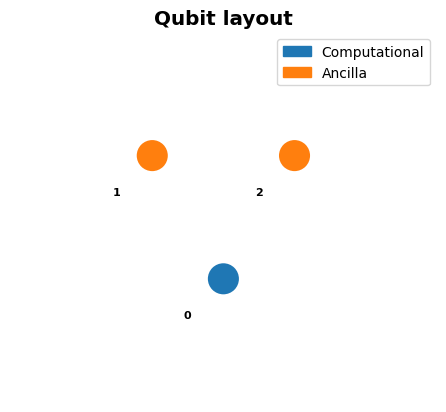

In [3]:
qubits.show_layout()

In [4]:
qubits.gate_connections

[GateConnection(id1=0, id2=1, d=0.9),
 GateConnection(id1=0, id2=2, d=0.9),
 GateConnection(id1=1, id2=2, d=0.9)]

In [5]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=125, n_grad=10)

np.save("both_theta_opt", theta_opt)
np.save("both_thetas", thetas)
np.save("both_errors", errors)

optimizer (optimization indices): setting seed=99612


C:\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.08081310012300613 
            Current gradient: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.05006847  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.01721427  0.          0.          0.         -0.01721427  0.
  0.          0.          0.          0.         -0.01172186  0.
  0.          0.          0.          0.          0.          0.
  0.0808131   0.          0.          0.          0.          0.
 -0.00445038  0.          0.          0.          0.          0.00085353
  0.          0.          0.          0.          0

In [6]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

In [7]:
theta_opt

array([ 0.22211806,  0.4       ,  0.4       ,  0.45879411,  0.58305597,
        0.54248426,  0.21213017,  0.45876771,  0.48171472,  0.38797326,
        0.40805471,  0.41722247,  0.52528764,  0.39144656,  0.39544901,
        0.39641916,  0.39788026,  0.58414763,  0.57083653,  0.43673343,
        0.39426263,  0.62363511,  0.62796116,  0.31771142,  0.11752221,
        0.36617349, -0.37723992,  0.61579231,  0.49808898,  0.72338533,
       -0.05228448,  0.43950232,  0.5868049 ,  0.27239039,  0.25690728,
        0.24952138,  0.32934914,  0.4540966 ,  0.40046635,  0.38815461,
        0.30564492,  0.45136849,  0.41150585,  0.36946445,  0.3207531 ,
        0.39140194,  0.60895077,  0.3264055 ,  0.39809107,  0.61291988,
        0.57649529,  0.33001869,  0.57864928,  0.25448003,  0.3016542 ,
        0.41606487,  0.65960677,  0.43517058,  0.4341402 ,  0.45011735,
        0.4240229 ,  0.48461976,  0.40690025,  0.34670367,  0.1881982 ,
        0.01340169, -0.24182584,  0.41322234,  0.4536778 ,  0.46

c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

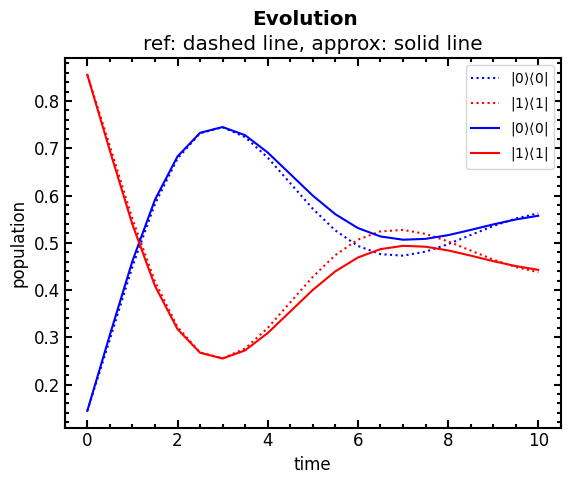

In [8]:
rho0 = rho_rand_haar(1, 4)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(20, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=20, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))
ts

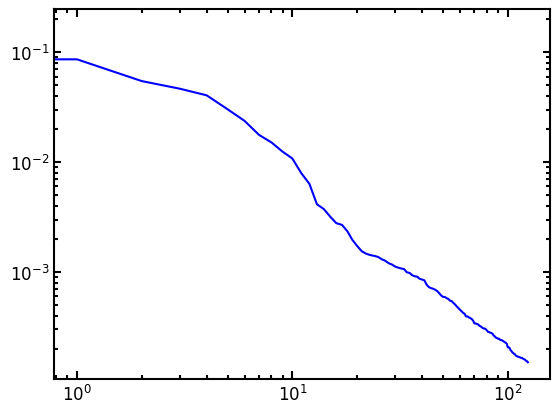

In [9]:
plt.loglog(errors)